In [129]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [130]:
import glob
import pickle

In [107]:
glob.glob("/content/gdrive/My Drive/Covid19Project/*")

['/content/gdrive/My Drive/Covid19Project/tweets.pkl']

In [131]:
!pip install preprocessor
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
import preprocessor as p
import os
import time

In [ ]:
# Twitter credentials
# Obtain them from your twitter developer account 
consumer_key = 'GsxziQUI7vJ95pCyZFbPFHrHA'
consumer_secret = 'iID72BAUILBhEcGvSpNkxhC22mkQjdOy76vTygRLN2L2MzngXX'
access_key = '918836874105499649-qq4EcQccudP9mFNI39NtLfl3gcXTTNs'
access_secret = 'UJMv0Kujhhb1qQ12w5Y5wO11mi4m51V6bCpHSAcIA0T08'

# Pass your twitter credentials to tweepy via its OAuthHandler
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:

def scraptweets(search_words, date_since, numTweets, numRuns):
    
    # Define a for-loop to generate tweets at regular intervals
    # We cannot make large API call in one go. Hence, let's try T times
    
    # Define a pandas dataframe to store the date:

    db_tweets = pd.DataFrame(columns = ['username', 'acctdesc', 'location', 'following',
                                        'followers', 'totaltweets', 'usercreatedts', 'tweetcreatedts',
                                        'retweetcount', 'text', 'hashtags']
                                )
    data = db_tweets.copy()
    #program_start = time.time()
    for i in range(0, numRuns):
        # We will time how long it takes to scrape tweets for each run:
        start_run = time.time()
        
        # Collect tweets using the Cursor object
        # .Cursor() returns an object that you can iterate or loop over to access the data collected.
        # Each item in the iterator has various attributes that you can access to get information about each tweet

        tweets = tweepy.Cursor(api.search, q=search_words, lang="en", since=date_since).items(numTweets)# Store these tweets into a python list
        tweet_list = [tweet for tweet in tweets]# Obtain the following info (methods to call them out):


        # user.screen_name - twitter handle
        # user.description - description of account
        # user.location - where is he tweeting from
        # user.friends_count - no. of other users that user is following (following)
        # user.followers_count - no. of other users who are following this user (followers)
        # user.statuses_count - total tweets by user
        # user.created_at - when the user account was created
        # created_at - when the tweet was created
        # retweet_count - no. of retweets
        # (deprecated) user.favourites_count - probably total no. of tweets that is favourited by user
        # retweeted_status.full_text - full text of the tweet
        # tweet.entities['hashtags'] - hashtags in the tweet# Begin scraping the tweets individually:

        noTweets = 0
        for tweet in tweet_list:# Pull the values
          username = tweet.user.screen_name
          acctdesc = tweet.user.description
          location = tweet.user.location
          following = tweet.user.friends_count
          followers = tweet.user.followers_count
          totaltweets = tweet.user.statuses_count
          usercreatedts = tweet.user.created_at
          tweetcreatedts = tweet.created_at
          retweetcount = tweet.retweet_count
          hashtags = tweet.entities['hashtags']
          #try:
           # text = tweet.retweeted_status.full_text
          #except AttributeError:
          text = tweet.text  # Add the 11 variables to the empty list - ith_tweet:
          ith_tweet = [username, acctdesc, location, following, followers, totaltweets,
                         usercreatedts, tweetcreatedts, retweetcount, text, hashtags]# Append to dataframe - db_tweets
          db_tweets.loc[len(db_tweets)] = ith_tweet# increase counter - noTweets  
          noTweets += 1
        
        # Run ended:
        end_run = time.time()
        duration_run = round((end_run-start_run)/60, 2)
        
        print('no. of tweets scraped for run {} is {}'.format(i + 1, noTweets))
        print('time take for {} run to complete is {} mins'.format(i+1, duration_run))
        print(db_tweets)
        #time.sleep(920) #15 minute sleep time# Once all runs have completed, save them to a single csv file:
        #data = data.append(db_tweets)

    #from datetime import datetime

    # # Obtain timestamp in a readable format
    # to_csv_timestamp = datetime.today().strftime('%Y%m%d_%H%M%S')# Define working path and filename
    # path = "/content/gdrive/My Drive/Covid19Project"#os.getcwd()
    # filename = path + '/data/' + to_csv_timestamp + 'TWEETS.csv'# Store dataframe in csv with creation date timestamp
    # db_tweets.to_csv(filename, index = False)
    
    #program_end = time.time()
    

    print('Scraping has completed!')
    #print('Total time taken to scrap is {}minutes.'.format(round(program_end - program_start)/60, 2))
    return db_tweets

In [ ]:
# Initialise these variables:
search_words = "COVID19"
date_since = "2020-06-19"
numTweets = 2500
numRuns = 4

# Call the function scraptweets
tweets_scraped = scraptweets(search_words, date_since, numTweets, numRuns)

no. of tweets scraped for run 1 is 2500
time take for 1 run to complete is 11.73 mins
             username  ...                                      hashtags
0     AgirlNol         ...  []                                          
1     BTCBob100k       ...  []                                          
2     yokonaka         ...  []                                          
3     LuisDelRio71     ...  []                                          
4     Saeedrawas2      ...  [{'text': 'COVID19', 'indices': [22, 30]}]  
...           ...      ...                                         ...  
2495  IrisPen33897835  ...  [{'text': 'COVID19', 'indices': [125, 133]}]
2496  ayodejiborokinn  ...  [{'text': 'COVID19', 'indices': [50, 58]}]  
2497  CharlesGirven    ...  [{'text': 'COVID19', 'indices': [64, 72]}]  
2498  SimonCocking     ...  [{'text': 'COVID19', 'indices': [34, 42]}]  
2499  FFS_cafc         ...  []                                          

[2500 rows x 11 columns]
no. of tweet

In [ ]:
with open('/content/gdrive/My Drive/Covid19Project/tweets.pkl', 'wb') as f:
  pickle.dump(tweets_scraped, f)

In [132]:
with open('/content/gdrive/My Drive/Covid19Project/tweets.pkl', 'rb') as f:   ###Data from 17 lines
    tweets = pickle.load(f)
    tweets

In [133]:
tweets

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,AgirlNol,"parent, Hufflepuff, retired librarian; always curious; I know what it means to miss New Orleans.",somewhere down in Texas,296,249,30460,2018-07-24 22:30:38,2020-06-22 18:47:49,7,"RT @MsMariaT: @RexChapman Recall, there are *multiple* Coronaviruses. The one Clean Air Exp claims to clean is NOT Covid19. 😳 https://t.co/…",[]
1,BTCBob100k,BTC Custodial Expert with considerable BTC ETF application experience,SEC@PinneapleUndertheSea,4514,708,17292,2009-07-17 19:17:19,2020-06-22 18:47:49,33,"RT @andrewbostom: Reminder that Florida covid19 deaths peaked at 83 on April 28th, &amp; there were 17 covid19 deaths yesterday, June 21st http…",[]
2,yokonaka,Passionate about mobile and politics as well as comments on fashion and pop culture,,468,460,29444,2009-04-27 23:36:37,2020-06-22 18:47:48,7,"RT @SovernNation: Breaking: San Francisco announces hair salons, barbers, museums, zoos, tattoo parlors, massage therapists, nail salons an…",[]
3,LuisDelRio71,,México,739,339,22108,2010-12-26 14:58:32,2020-06-22 18:47:48,20347,RT @DrEricDing: Holy moly- I’m crying for MEXICO 🇲🇽. The over 50% is the *POSITIVITY* percentage!!! More than half of all who get a test ar…,[]
4,Saeedrawas2,,,332,13,17,2019-10-22 17:03:09,2020-06-22 18:47:48,1,"RT @abdulhelal: Since #COVID19 crisis erupted, ICRC team in RHUH directly &amp; indirectly supported/improved health status of/saved the lives…","[{'text': 'COVID19', 'indices': [22, 30]}]"
...,...,...,...,...,...,...,...,...,...,...,...
9995,Marowosaiyeam,"Welfare development advocate, political & social analyst, Economist, #Sui-generis.","Abuja, Nigeria",404,188,2475,2017-01-10 07:54:56,2020-06-22 19:22:34,65,RT @SulaiOdus: Great news... We should appreciate ours too. 👍🏽\n\nA team of Nigerian scientists recently announced the discovery of a #COVID1…,[]
9996,ebmeacham,Author of Delta Epiphany: Robert F. Kennedy in Mississippi. Journalist. Professor. Lover of stories. Saver of string. Views are mine alone.,"Oxford, MS",557,425,5050,2009-04-08 18:32:37,2020-06-22 19:22:34,1,RT @FBrownWilliams: The chronic underfunding of our public health systems lands us here. No daily data for days because their systems can’t…,[]
9997,MykaSarai97,22|Flight Attendant| 🦋,"Houston, TX",180,186,1424,2018-11-14 14:59:15,2020-06-22 19:22:34,2571,RT @ohyesitseve: 500 Delta employees test positive for covid19.... y’all keep flying.,[]
9998,ButterMLKe,,,1253,294,53913,2013-02-05 21:22:13,2020-06-22 19:22:34,358,RT @ShawnInArizona: cc: All hospital staff in Florida\n\nYour Governor is trying to hide every #COVID19 problem he created - today it's the I…,"[{'text': 'COVID19', 'indices': [93, 101]}]"


In [134]:
# Generic ones
import numpy as np
import pandas as pd
import os
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# Word processing libraries
import re
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Widen the size of each cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [112]:
tweets.text

0       RT @MsMariaT: @RexChapman Recall, there are *multiple* Coronaviruses. The one Clean Air Exp claims to clean is NOT Covid19. 😳 https://t.co/…    
1       RT @andrewbostom: Reminder that Florida covid19 deaths peaked at 83 on April 28th, &amp; there were 17 covid19 deaths yesterday, June 21st http…
2       RT @SovernNation: Breaking: San Francisco announces hair salons, barbers, museums, zoos, tattoo parlors, massage therapists, nail salons an…    
3       RT @DrEricDing: Holy moly- I’m crying for MEXICO 🇲🇽. The over 50% is the *POSITIVITY* percentage!!! More than half of all who get a test ar…    
4       RT @abdulhelal: Since #COVID19 crisis erupted, ICRC team in RHUH directly &amp; indirectly supported/improved health status of/saved the lives… 
                                                                             ...                                                                        
9995    RT @SulaiOdus: Great news... We should appreciate ours too. 👍🏽\n\nA team o

In [113]:
# Check out the number of unique users in the dataset
# It can be seen that some users are more proactive on the social media platform than others.
tweets['username'].value_counts()

# # It is acceptable to have repeated username since they can tweet multiple times throughout the day.
# tweets[tweets['username'] == 'Phy32833861']

NaattuVarthakal    23
dainbaznh          22
Juan_A_Llorente    19
wesrap             13
syzVeQGg5SoNhs5    12
                   ..
hassaanulhaq01     1 
rauldallas         1 
luckiselki         1 
Sonitchka2         1 
rajendra539        1 
Name: username, Length: 8815, dtype: int64

In [ ]:
type(tweets)

pandas.core.frame.DataFrame

In [115]:
# # Let's drop duplicated rows:
# print('Initial size of dataset before dropping duplicated rows:', tweets.shape)
# tweets.drop_duplicates(keep = "First")

print('Current size of dataset after dropping duplicated rows, if any, is:', tweets.shape)
print(tweets.head())

Current size of dataset after dropping duplicated rows, if any, is: (10000, 11)
       username  ...                                    hashtags
0  AgirlNol      ...  []                                        
1  BTCBob100k    ...  []                                        
2  yokonaka      ...  []                                        
3  LuisDelRio71  ...  []                                        
4  Saeedrawas2   ...  [{'text': 'COVID19', 'indices': [22, 30]}]

[5 rows x 11 columns]


In [135]:
tweets.dropna(subset = ['text'], inplace = True)

In [136]:
# The unicode accounts for chinese characters and punctuations.
def strip_chinese_words(string):
    # list of english words
    en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(string))
    
    # Remove word from the list, if not english
    for c in string:
        if c not in en_list:
            string = string.replace(c, '')
    return string

In [137]:
# Apply strip_chinese_words(...) on the column 'text'
tweets['text'] = tweets['text'].apply(lambda x: strip_chinese_words(x))
tweets.head()



,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,AgirlNol,"parent, Hufflepuff, retired librarian; always curious; I know what it means to miss New Orleans.",somewhere down in Texas,296,249,30460,2018-07-24 22:30:38,2020-06-22 18:47:49,7,"RT @MsMariaT: @RexChapman Recall, there are *multiple* Coronaviruses. The one Clean Air Exp claims to clean is NOT Covid19. 😳 https://t.co/…",[]
1,BTCBob100k,BTC Custodial Expert with considerable BTC ETF application experience,SEC@PinneapleUndertheSea,4514,708,17292,2009-07-17 19:17:19,2020-06-22 18:47:49,33,"RT @andrewbostom: Reminder that Florida covid19 deaths peaked at 83 on April 28th, &amp; there were 17 covid19 deaths yesterday, June 21st http…",[]
2,yokonaka,Passionate about mobile and politics as well as comments on fashion and pop culture,,468,460,29444,2009-04-27 23:36:37,2020-06-22 18:47:48,7,"RT @SovernNation: Breaking: San Francisco announces hair salons, barbers, museums, zoos, tattoo parlors, massage therapists, nail salons an…",[]
3,LuisDelRio71,,México,739,339,22108,2010-12-26 14:58:32,2020-06-22 18:47:48,20347,RT @DrEricDing: Holy moly- I’m crying for MEXICO 🇲🇽. The over 50% is the *POSITIVITY* percentage!!! More than half of all who get a test ar…,[]
4,Saeedrawas2,,,332,13,17,2019-10-22 17:03:09,2020-06-22 18:47:48,1,"RT @abdulhelal: Since #COVID19 crisis erupted, ICRC team in RHUH directly &amp; indirectly supported/improved health status of/saved the lives…","[{'text': 'COVID19', 'indices': [22, 30]}]"


In [119]:
# Define function to sieve out @users in a tweet:
def mentioned_users(string):
    usernames = re.findall('@[^\s]+', string)
    return usernames

# Create a new column and apply the function on the column 'text'
tweets['mentioned_users'] = tweets['text'].apply(lambda x: mentioned_users(x))
tweets.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,mentioned_users
0,AgirlNol,"parent, Hufflepuff, retired librarian; always curious; I know what it means to miss New Orleans.",somewhere down in Texas,296,249,30460,2018-07-24 22:30:38,2020-06-22 18:47:49,7,"RT @MsMariaT: @RexChapman Recall, there are *multiple* Coronaviruses. The one Clean Air Exp claims to clean is NOT Covid19. 😳 https://t.co/…",[],"[@MsMariaT:, @RexChapman]"
1,BTCBob100k,BTC Custodial Expert with considerable BTC ETF application experience,SEC@PinneapleUndertheSea,4514,708,17292,2009-07-17 19:17:19,2020-06-22 18:47:49,33,"RT @andrewbostom: Reminder that Florida covid19 deaths peaked at 83 on April 28th, &amp; there were 17 covid19 deaths yesterday, June 21st http…",[],[@andrewbostom:]
2,yokonaka,Passionate about mobile and politics as well as comments on fashion and pop culture,,468,460,29444,2009-04-27 23:36:37,2020-06-22 18:47:48,7,"RT @SovernNation: Breaking: San Francisco announces hair salons, barbers, museums, zoos, tattoo parlors, massage therapists, nail salons an…",[],[@SovernNation:]
3,LuisDelRio71,,México,739,339,22108,2010-12-26 14:58:32,2020-06-22 18:47:48,20347,RT @DrEricDing: Holy moly- I’m crying for MEXICO 🇲🇽. The over 50% is the *POSITIVITY* percentage!!! More than half of all who get a test ar…,[],[@DrEricDing:]
4,Saeedrawas2,,,332,13,17,2019-10-22 17:03:09,2020-06-22 18:47:48,1,"RT @abdulhelal: Since #COVID19 crisis erupted, ICRC team in RHUH directly &amp; indirectly supported/improved health status of/saved the lives…","[{'text': 'COVID19', 'indices': [22, 30]}]",[@abdulhelal:]


In [138]:
# Define Emoji_patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

# Define the function to implement POS tagging:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


# Define the main function to clean text in various ways:
def clean_text(text):
    
    # Apply regex expressions first before converting string to list of tokens/words:
    # 1. remove @usernames
    text = re.sub('@[^\s]+', '', text)
    
    # 2. remove URLs
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    
    # 3. remove hashtags entirely i.e. #hashtags
    text = re.sub(r'#([^\s]+)', '', text)
    
    # 4. remove emojis
    text = emoji_pattern.sub(r'', text)
    
    # 5. Convert text to lowercase
    text = text.lower()
    
    # 6. tokenize text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # 7. remove numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # 8. remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # 9. remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # 10. pos tag text and lemmatize text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # 11. remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    
    return(text)

In [139]:
# Apply function on the column 'text':
tweets['cleaned_text'] = tweets['text'].apply(lambda x: clean_text(x))
tweets.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,cleaned_text
0,AgirlNol,"parent, Hufflepuff, retired librarian; always curious; I know what it means to miss New Orleans.",somewhere down in Texas,296,249,30460,2018-07-24 22:30:38,2020-06-22 18:47:49,7,"RT @MsMariaT: @RexChapman Recall, there are *multiple* Coronaviruses. The one Clean Air Exp claims to clean is NOT Covid19. 😳 https://t.co/…",[],rt recall multiple coronaviruses one clean air exp claim clean
1,BTCBob100k,BTC Custodial Expert with considerable BTC ETF application experience,SEC@PinneapleUndertheSea,4514,708,17292,2009-07-17 19:17:19,2020-06-22 18:47:49,33,"RT @andrewbostom: Reminder that Florida covid19 deaths peaked at 83 on April 28th, &amp; there were 17 covid19 deaths yesterday, June 21st http…",[],rt reminder florida death peak april amp death yesterday june http…
2,yokonaka,Passionate about mobile and politics as well as comments on fashion and pop culture,,468,460,29444,2009-04-27 23:36:37,2020-06-22 18:47:48,7,"RT @SovernNation: Breaking: San Francisco announces hair salons, barbers, museums, zoos, tattoo parlors, massage therapists, nail salons an…",[],rt break san francisco announces hair salon barber museums zoo tattoo parlor massage therapist nail salon an…
3,LuisDelRio71,,México,739,339,22108,2010-12-26 14:58:32,2020-06-22 18:47:48,20347,RT @DrEricDing: Holy moly- I’m crying for MEXICO 🇲🇽. The over 50% is the *POSITIVITY* percentage!!! More than half of all who get a test ar…,[],rt holy moly i’m cry mexico positivity percentage half get test ar…
4,Saeedrawas2,,,332,13,17,2019-10-22 17:03:09,2020-06-22 18:47:48,1,"RT @abdulhelal: Since #COVID19 crisis erupted, ICRC team in RHUH directly &amp; indirectly supported/improved health status of/saved the lives…","[{'text': 'COVID19', 'indices': [22, 30]}]",rt since crisis erupt icrc team rhuh directly amp indirectly supported/improved health status of/saved lives…


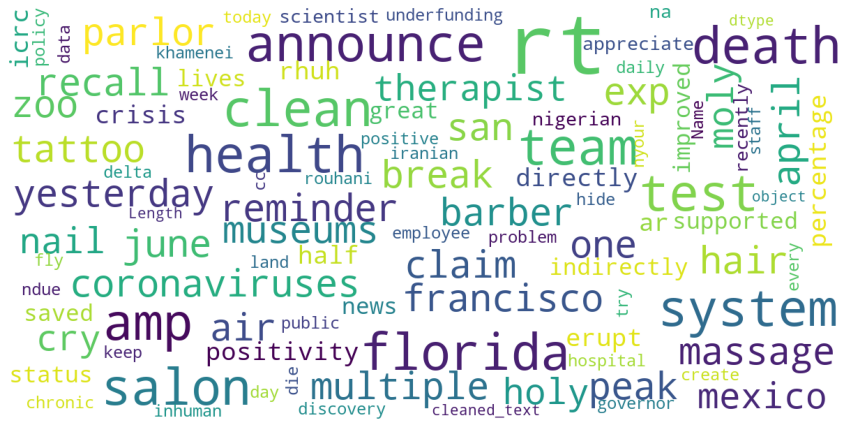

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):
  wordcloud = WordCloud(
      background_color = 'white',
      max_words = 200,
      max_font_size = 40, 
      scale = 3,
      random_state = 42).generate(str(data))
  fig = plt.figure(1, figsize = (15, 15))
  plt.axis('off')
  if title: 
    fig.suptitle(title, fontsize = 20)
    fig.subplots_adjust(top = 2.3)
  plt.imshow(wordcloud)
  plt.show()
  
# print wordcloud
show_wordcloud(tweets['cleaned_text'])



In [141]:
# Clean up location
# Replace NaN (empty) values with n.a to indicate that the user did not state his location
# Define a function to handle this:
def remove_nan(text):
    if pd.isnull(text) == True: # entry is NaN
        text = 'n.a'
    else:
        # lowercase text for possible easy handling
        text = text.lower()
        
    return text



In [142]:
# Apply function on column - data['location']
tweets['location'] = tweets['location'].apply(lambda x: remove_nan(x))

# Check out the updated columns
print(tweets.head()['location'])

0    somewhere down in texas 
1    sec@pinneapleunderthesea
2                            
3    méxico                  
4                            
Name: location, dtype: object


In [143]:
# Let's take a quick look at the value_counts()
tweets['location'].value_counts()

                                  2709
united states                     123 
washington, dc                    78  
new york, ny                      59  
california, usa                   58  
                                  ..  
jinggang mountains                1   
delaware, usa - washington, dc    1   
hoylake, england                  1   
northern illinois                 1   
noida, india                      1   
Name: location, Length: 3557, dtype: int64


#Feature Engineering - Rule-based Word Processing

We will focus on Rule-based word processing for our sentiment analysis. W
Generating Sentiments from Tweets with NLTK Vader_Lexicon Library

We will be using the Vader_lexicon library from NLTK to generate sentiment for each tweet. Vader uses a lexicon of words to determine which words in the reviews are positive or negative. It will return a set of 4 scores on the positivity, negativity, neutrality of a text, and also an overall score whether a text is positive or negative.

    Positivity - 'pos'
    Negativity - 'neg'
    Neutrality - 'neu'
    Overall Score - 'compound'



In [144]:
# Importing VADER from NLTK
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a sid object called SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()

# Apply polarity_score method of SentimentIntensityAnalyzer()
tweets['sentiment'] = tweets['cleaned_text'].apply(lambda x: sid.polarity_scores(x))

# Keep only the compound scores under the column 'Sentiment'
tweets = pd.concat([tweets.drop(['sentiment'], axis = 1), tweets['sentiment'].apply(pd.Series)], axis = 1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [145]:
# New column: number of characters in 'review'
tweets['numchars'] = tweets['cleaned_text'].apply(lambda x: len(x))

# New column: number of words in 'review'
tweets['numwords'] = tweets['cleaned_text'].apply(lambda x: len(x.split(" ")))

# Check the new columns:
tweets.tail(2)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,cleaned_text,neg,neu,pos,compound,numchars,numwords
9998,ButterMLKe,,,1253,294,53913,2013-02-05 21:22:13,2020-06-22 19:22:34,358,RT @ShawnInArizona: cc: All hospital staff in Florida\n\nYour Governor is trying to hide every #COVID19 problem he created - today it's the I…,"[{'text': 'COVID19', 'indices': [93, 101]}]",rt cc hospital staff florida\n\nyour governor try hide every problem create today i…,0.251,0.629,0.12,-0.3182,82,13
9999,kimianila,"I have one wish, to see a #FreeIran and the smiles of all Iranian children",,689,540,10160,2016-12-16 20:15:22,2020-06-22 19:22:33,1,"In just over a week, 10000 Iranians died from #COVID19 \nDue to the inhuman policies of Khamenei and Rouhani, the… https://t.co/fXsGeXkiIV","[{'text': 'COVID19', 'indices': [46, 54]}]",week iranian die \ndue inhuman policy khamenei rouhani the…,0.328,0.672,0.00,-0.5994,58,9



#Word Embeddings - Training Word2Vec using Gensim

Word embeddings involve the mapping of words in the corpus to numerical vectors, where similar words sharing similar contexts will have similar vectors as well. It will involve a shallow two-layer neural network that will train a matrix/tensor called the embedding matrix. By taking the matrix product of the embedding matrix and one-hot vector representation of each word in the corpus, we will arrive at the embedding vector.

We will be using Gensim - an open-source Python library - to generate doc2vec.
Doc2vec should be used over word2vec to obtain the vector representation of a 'document', in this case, our tweets. Word2vec will only give us the vector representation of a 'word'.


In [146]:
# Import the Gensim package
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tweets["cleaned_text"].apply(lambda x: x.split(" ")))]

# Train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size = 10, window = 2, min_count = 1, workers = 4)

# Transform each document into a vector data
doc2vec_df = tweets["cleaned_text"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
tweets = pd.concat([tweets, doc2vec_df], axis = 1)

# Check out the newly added columns:
tweets.tail(2)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,cleaned_text,neg,neu,pos,compound,numchars,numwords,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,doc2vec_vector_5,doc2vec_vector_6,doc2vec_vector_7,doc2vec_vector_8,doc2vec_vector_9
9998,ButterMLKe,,,1253,294,53913,2013-02-05 21:22:13,2020-06-22 19:22:34,358,RT @ShawnInArizona: cc: All hospital staff in Florida\n\nYour Governor is trying to hide every #COVID19 problem he created - today it's the I…,"[{'text': 'COVID19', 'indices': [93, 101]}]",rt cc hospital staff florida\n\nyour governor try hide every problem create today i…,0.251,0.629,0.12,-0.3182,82,13,0.013864,-0.149765,0.048233,0.050073,-0.100964,-0.11555,0.025891,0.048417,0.105131,0.075532
9999,kimianila,"I have one wish, to see a #FreeIran and the smiles of all Iranian children",,689,540,10160,2016-12-16 20:15:22,2020-06-22 19:22:33,1,"In just over a week, 10000 Iranians died from #COVID19 \nDue to the inhuman policies of Khamenei and Rouhani, the… https://t.co/fXsGeXkiIV","[{'text': 'COVID19', 'indices': [46, 54]}]",week iranian die \ndue inhuman policy khamenei rouhani the…,0.328,0.672,0.00,-0.5994,58,9,0.092012,0.122617,-0.019022,0.088392,-0.072013,-0.09246,-0.078638,0.238074,0.233457,0.160720



#TD-IDF Columns

TD-IDF stands for Term Frequency-Inverse Document Frequency, which is used to reflect how important a word is to a document in a collection or corpus. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

    Term Frequency - the number of times a term occurs in a document.
    Inverse Document Frequency - an inverse document frequency factor that diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

Since NLTK does not support TF-IDF, we will use the tfidfvectorizer function from the Python sklearn library.


In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Call the function tfidfvectorizer
# min_df is the document frequency threshold for ignoring terms with a lower threshold.
# stop_words is the words to be removed from the corpus. We will check for stopwords again even though we had already performed it once previously.
# We will only consider a maximum of 100 features since in our previous runs.
tfidf = TfidfVectorizer(
    max_features = 100,
    min_df = 10,
    stop_words = 'english'
)

# Fit_transform our 'revi`ew' (the corpus) using the tfidf object from above
tfidf_result = tfidf.fit_transform(tweets['cleaned_text']).toarray()

# Extract the frequencies and store them in a temporary dataframe
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())

# Rename the column names and index
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = tweets.index

# Concatenate the two dataframes - 'dataset' and 'tfidf_df'
# Note: Axis = 1 -> add the 'tfidf_df' dataframe along the columns  or add these columns as columns in 'dataset'.
tweets = pd.concat([tweets, tfidf_df], axis = 1) 

# Check out the new 'dataset' dataframe
tweets.tail(2)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,cleaned_text,neg,neu,pos,compound,numchars,numwords,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,doc2vec_vector_5,doc2vec_vector_6,doc2vec_vector_7,doc2vec_vector_8,doc2vec_vector_9,word_amp,word_ar,word_bighit,word_bts,word_business,word_campaign,word_care,word_case,word_come,word_community,word_concert,word_contain,...,word_new,word_news,word_number,word_pandemic,word_patient,word_people,word_percentage,word_positive,word_positivity,word_post,word_public,word_record,word_report,word_rt,word_safe,word_say,word_slow,word_spread,word_staff,word_state,word_stay,word_support,word_test,word_think,word_time,word_today,word_toll,word_total,word_track,word_travel,word_trump,word_update,word_use,word_ve,word_virus,word_wear,word_week,word_work,word_world,word_year
9998,ButterMLKe,,,1253,294,53913,2013-02-05 21:22:13,2020-06-22 19:22:34,358,RT @ShawnInArizona: cc: All hospital staff in Florida\n\nYour Governor is trying to hide every #COVID19 problem he created - today it's the I…,"[{'text': 'COVID19', 'indices': [93, 101]}]",rt cc hospital staff florida\n\nyour governor try hide every problem create today i…,0.251,0.629,0.12,-0.3182,82,13,0.013864,-0.149765,0.048233,0.050073,-0.100964,-0.11555,0.025891,0.048417,0.105131,0.075532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106204,0.0,0.0,0.0,0.0,0.420491,0.0,0.0,0.0,0.0,0.0,0.0,0.306817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9999,kimianila,"I have one wish, to see a #FreeIran and the smiles of all Iranian children",,689,540,10160,2016-12-16 20:15:22,2020-06-22 19:22:33,1,"In just over a week, 10000 Iranians died from #COVID19 \nDue to the inhuman policies of Khamenei and Rouhani, the… https://t.co/fXsGeXkiIV","[{'text': 'COVID19', 'indices': [46, 54]}]",week iranian die \ndue inhuman policy khamenei rouhani the…,0.328,0.672,0.00,-0.5994,58,9,0.092012,0.122617,-0.019022,0.088392,-0.072013,-0.09246,-0.078638,0.238074,0.233457,0.160720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


No. of Positive Sentiments vs No. of Negative Sentiments

Next, we look at what is the overall distribution of positive and negative tweets. Based on the SentimentIntensityAnalyzer from the NLTK Vader-Lexicon library, this analyzer examines the sentiment of a sentence, on how positive, neutral or negative it is. We can interpret the sentiment in the following manner. If a sentiment is positive, it could mean that it is pro-government and/or police. Whereas, a negative sentiment could mean that it is anti- government and/or police, and supportive towards the protesters.

The analyzer returns 4 scores for each sentence namely, 'positive', 'negative', 'neutral' and 'compound'. The score 'compound' returns the overall sentiment of a sentence with range of [-1, 1]. For our current purpose, we want to classify each tweet into 5 classes and assign a range of values for each of them:

    Very positive '5' - [0.55, 1.00]
    Positive '4' - [0.10, 0.55)
    Neutral '3' - (-0.10, 0.10)
    Negative '2' - (-0.55, -0.10]
    Very negative '1' - [-1.00, -0.55]

Note: the range of values for a neutral sentiment is more stringent.

In [148]:
# Focus on 'compound' scores
# Create a new column called 'sentiment_class'
sentimentclass_list = []

for i in range(0, len(tweets)):
    
    # current 'compound' score:
    curr_compound = tweets.iloc[i,:]['compound']
    
    if (curr_compound <= 1.0 and curr_compound >= 0.55):
        sentimentclass_list.append(5)
    elif (curr_compound < 0.55 and curr_compound >= 0.10):
        sentimentclass_list.append(4)
    elif (curr_compound < 0.10 and curr_compound > -0.10):
        sentimentclass_list.append(3)
    elif (curr_compound <= -0.10 and curr_compound > -0.55):
        sentimentclass_list.append(2)
    elif (curr_compound <= -0.55 and curr_compound >= -1.00):
        sentimentclass_list.append(1)

# Add the new column 'sentiment_class' to the dataframe
tweets['sentiment_class'] = sentimentclass_list

# Check out the new column
tweets.tail()['sentiment_class']

9995    5
9996    3
9997    5
9998    2
9999    1
Name: sentiment_class, dtype: int64

In [149]:
# Verify if the classification assignment is correct:
tweets.iloc[0:5, :][['compound', 'sentiment_class']]

,compound,sentiment_class
0,0.6597,5
1,-0.8316,1
2,0.0000,3
3,0.0516,3
4,-0.6249,1


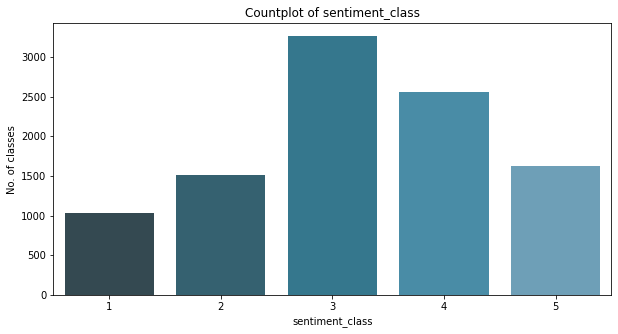

In [150]:
import seaborn as sns

# Distribution of sentiment_class
plt.figure(figsize = (10,5))
sns.set_palette('PuBuGn_d')
sns.countplot(tweets['sentiment_class'])
plt.title('Countplot of sentiment_class')
plt.xlabel('sentiment_class')
plt.ylabel('No. of classes')
plt.show()

In [151]:
# Display full text:
pd.set_option('display.max_colwidth', -1)

# Look at some examples of negative, neutral and positive tweets

# Filter 10 negative original tweets:
print("10 random negative original tweets and their sentiment classes:")
tweets[(tweets['sentiment_class'] == 1) | (tweets['sentiment_class'] == 2)].sample(n=10)[['text', 'sentiment_class']]

10 random negative original tweets and their sentiment classes:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,text,sentiment_class
4493,RT @ShawnInArizona: cc: All hospital staff in Florida\n\nYour Governor is trying to hide every #COVID19 problem he created - today it's the I…,2
8452,RT @kazzacoey: Why have I got this dreaded feeling even if numbers of COVID19 escalate this Government will lie to us and hide numbers...Th…,1
7731,BREAKING - Texas Governor says #COVID19 is spreading at an unacceptable rate now. https://t.co/e5imyTREJY,2
7988,RT @DrEricDing: ⚠️More worrisome for Mexico🇲🇽: \n\n📌Mexico has one of lowest daily testing per capita\n📌Mexico’s daily testing per capita rate…,1
275,"RT @ScienceMagazine: Scientists have identified a pair of neutralizing antibodies, isolated from a recovered #COVID19 patient, that block t…",1
5838,RT @Leam_Chamber: Small businesses have been at the centre of the economic crisis created by #COVID19 &amp; many have pivoted during this unpre…,2
3938,“Be patient. It is too risky to open learning institutions” – President Museveni\nhttps://t.co/N46tcHcOe4 \n#M7Address #COVID19UG #COVID19,2
6285,RT @redouad: The Portuguese prime minister just announced that some form of lockdown and restrictions would be reimposed in Lisbon: https:/…,2
3802,"Latest worldwide COVID-19 data: 9,120,215 cases, 472,017 deaths.\n\nA 5.18% fatality rate.",1
8558,"RT @LT_OSCE: #StrongerTogether is not an empty slogan! \nIn response to a request for help fighting COVID19 by Armenian Gov., a team of #Lit…",2


In [152]:
# Filter 10 neutral original tweets:
print("10 random neutral original tweets and their sentiment classes:")
tweets[(tweets['sentiment_class'] == 3)].sample(n=10)[['text', 'sentiment_class']]

10 random neutral original tweets and their sentiment classes:


,text,sentiment_class
198,"RT @impakterdotcom: https://t.co/AFEovr6SKZ\n\nRead more 👉: \n\nThe effects and #impact of COVID-19🦠 in South Africa 🇿🇦, Ubuntu.\n\nArticle by @M…",3
6541,Appears to be a number of similar issues across the country. \nhttps://t.co/FaJEAWUd5H,3
2516,RT @GovMurphy: ‼️LOOK AT THIS MAP FROM @CovidActNow‼️\n\nNew Jersey is ONE of ONLY FOUR STATES which it deems as being on-track to contain #C…,3
3376,RT @JTHjournal: New #COVID__19 forum article: @MedcalfRobert et al @MonashUni on link fibrinolysis (breakdown of #blood clots) and COVID19…,3
8482,RT @lapublichealth: REMEMBER: Wear a cloth face covering when around others not from your household. Children under 2 are not required to w…,3
744,$DAL to resume flights between US and #China. #flights resume between #Seattle &amp; Shanghai-Pudong on Jun-25. This is… https://t.co/yEs38FTCEt,3
6488,"RT @VinGuptaMD: When “experts” say that #COVID19 doesn’t exist on surfaces so don’t worry so much about hand hygiene, or when ⁦@VP⁩ says pp…",3
1733,RT @JENFL23: There are 550k homeless individuals in 🇺🇸 today.\n\nThe #COVID19 pandemic could push it to over 1 million by years end.\n\nI suppo…,3
8880,"RT @FMCAgCanada: To Canada’s farmers, retailers and ag industry partners: #coronavirus #COVID19 https://t.co/Lv1wPsjwYq",3
7819,RT @GovMurphy: ‼️LOOK AT THIS MAP FROM @CovidActNow‼️\n\nNew Jersey is ONE of ONLY FOUR STATES which it deems as being on-track to contain #C…,3


In [153]:
# Filter 20 positive original tweets:
print("20 random positive original tweets and their sentiment classes:")
tweets[(tweets['sentiment_class'] == 4) | (tweets['sentiment_class'] == 5)].sample(n=20)[['text', 'sentiment_class']]

20 random positive original tweets and their sentiment classes:


,text,sentiment_class
1675,RT @HelenBranswell: With preprints playing such a big role in the dissemination of #Covid19 data &amp; with there being such a firehose of info…,4
2038,#AmericaFirst #COVID19 #pandemic #Immunity comes from #Cannabinoids in plants like #Cannabis #JimCrow #DrugWar on F… https://t.co/AXgKn4bl6z,4
7552,"RT @__gaciria: ""BTS and BigHit have donated $1M to Live Nation's Crew Nation campaign. The fund was launched to support live concert crews…",4
4483,"RT @NorthLeftVoices: It's very interesting watching the Scottish Government's daily #Covid19 briefing and seeing all that positive, forward…",5
9647,"RT @__gaciria: ""BTS and BigHit have donated $1M to Live Nation's Crew Nation campaign. The fund was launched to support live concert crews…",4
3022,RT @masego_meyer: Please note everything I post on my profile is in my personal capacity and based on my experience as a person infected wi…,4
6180,"RT @__gaciria: ""BTS and BigHit have donated $1M to Live Nation's Crew Nation campaign. The fund was launched to support live concert crews…",4
5351,RT @ohyesitseve: 500 Delta employees test positive for covid19.... y’all keep flying.,5
3884,RT @himantabiswa: 📌Alert ~ 267 new #COVID19+ cases reported in Assam today. \n\n↗️Total cases 5853\n↗️Recovered 3565\n↗️Active cases 2276\n↗️Dea…,4
9188,"RT @DrEricDing: 3) Again, please don’t try to pursue “herd immunity” without a vaccine. Here is a comparison of Sweden versus rest of the E…",4




Some of the sentiment scores for sentences are not accurate to capture the sentiments of the tweets. The neutral tweets seem more positive than the positive ones.
Hence, this short exercise reveals a shortcoming in using a rule-based/lexicon-based model such as the SentimentIntensityAnalzyer from VADER Lexicon library. Since words contained in the tweets are measured against a pre-defined dictionary of positive and negative words, it fails to examine and take the context of the tweets into account.


In [154]:
# the column data['hashtags'] returns a list of string(s) for each tweet.
# Build a list of all hashtags in the dataset

hashtag_list = []

for i in range(0, len(tweets)):
    # Obtain the current list of hashtags
    curr_hashtag = tweets.iloc[i, :]['hashtags']
    
    # Extract and append the hashtags to 'hashtag_list':
    for j in range(0, len(curr_hashtag)):
        hashtag_list.append(curr_hashtag[j])
    
# Print out the list
print(hashtag_list)

[{'text': 'COVID19', 'indices': [22, 30]}, {'text': 'COVID19', 'indices': [18, 26]}, {'text': 'COVID19', 'indices': [14, 22]}, {'text': 'COVID19', 'indices': [29, 37]}, {'text': 'NewAbnormal', 'indices': [50, 62]}, {'text': 'COVID19', 'indices': [63, 71]}, {'text': 'COVID19', 'indices': [93, 101]}, {'text': 'Florida', 'indices': [21, 29]}, {'text': 'coronavirus', 'indices': [45, 57]}, {'text': 'COVID19', 'indices': [91, 99]}, {'text': 'COVID19', 'indices': [36, 44]}, {'text': 'Coronavirus', 'indices': [70, 82]}, {'text': 'coronavirus', 'indices': [38, 50]}, {'text': 'COVID19', 'indices': [51, 59]}, {'text': 'Resist', 'indices': [60, 67]}, {'text': 'Trump', 'indices': [68, 74]}, {'text': '1u', 'indices': [75, 78]}, {'text': 'maga', 'indices': [79, 84]}, {'text': 'qanon', 'indices': [85, 91]}, {'text': 'wwg1wga', 'indices': [92, 100]}, {'text': 'TrumpRallyFail', 'indices': [101, 116]}, {'text': 'NotMeUs', 'indices': [117, 125]}, {'text': 'COVID19', 'indices': [52, 60]}, {'text': 'Tourism

In [ ]:
# No. of hashtags
print('No. of hashtags used in {} tweets is {}'.format(len(tweets), len(hashtag_list)))

No. of hashtags used in 2500 tweets is 2521


In [ ]:
# Now we have the list of hashtags, we can convert this into a simple DataFrame, which will be used for visualization.
df_hashtag = pd.DataFrame(
    {'hashtags': hashtag_list}
)

print(df_hashtag.head())
print('Shape of df_hashtag is:', df_hashtag.shape)

                                                    hashtags
0  {'text': 'Beijing', 'indices': [0, 8]}                   
1  {'text': 'COVID19', 'indices': [24, 32]}                 
2  {'text': 'icaiexam', 'indices': [50, 59]}                
3  {'text': 'ICAI_dont_discriminate', 'indices': [60, 83]}  
4  {'text': 'ICAI_ExamCantBeOptional', 'indices': [84, 108]}
Shape of df_hashtag is: (2521, 1)


In [ ]:
import pickle
import os
# filename = "C:/Users/Ritwika Mukherjee/Google Drive/Colab Notebooks/mbta_past_alerts.pkl"
# os.makedirs(os.path.dirname(filename), exist_ok=True)
# data = response_lists

In [ ]:
with open('/content/gdrive/My Drive/Covid19Project/tweets.pkl', 'rb') as f:   ###Data from 17 lines
    mynewlist = pickle.load(f)
    mynewlist

In [ ]:
#Another way to pull information!
tweets = []
text_query = 'COVID19'
count = 100
try:
# Pulling individual tweets from query
  for tweet in api.search(q=text_query, count=count):# Adding to list that contains all tweets
    tweets.append((tweet.created_at,tweet.id,tweet.text))
except BaseException as e:
  print('failed on_status,',str(e))
  time.sleep(3)